# Example 1: Determine FI Location



In [6]:
import pickle

success_x = []
success_y = []
success_z = []
success_ext = []
norm_x = []
norm_y = []

def LoadGCPickle(filePath):
    inputFile = open(filePath,'rb')
    gcData = pickle.load(inputFile)
    gcDict = gcData.res_dict_of_lists(gcData._result_dict)
    return gcDict, gcData

def GenXYData(results):
    global success_x,success_y,success_z,success_ext,norm_x,norm_y
    for x in range(0,len(results['success'])):
        if results['success'][x] == 1:
            success_x.append(results['x'][x])
            success_y.append(results['y'][x])
            success_ext.append(results['ext_offset'][x])
            if 'z' in results:
                success_z.append(results['z'][x])
        else:
            norm_x.append(results['x'][x])
            norm_y.append(results['y'][x])
    
def GenDimensionData(results,dimension):
    VALS = {}
    for x in range(0,len(results['success'])):
        if dimension not in results:
            return None
        if results['success'][x] == 1:
            if results[dimension][x] not in VALS:
                VALS[results[dimension][x]] = 1
            else:
                VALS[results[dimension][x]] += 1
    return VALS

In [44]:
%matplotlib widget
gcDict, gcPickle = LoadGCPickle('./logs/gc-pickle-stm32f4-184_185_86.5_87.5_NO_BOOT_MODE_.5_SLEEP.pickle')
GenXYData(gcDict)
yvals = GenDimensionData(gcDict,'y')
ext_vals = GenDimensionData(gcDict,'ext_offset')
xvals = GenDimensionData(gcDict,'x')
zvals = GenDimensionData(gcDict,'z')

# Coordinate Graphs

The following graph displays the density of successes at a given `X` coordinate value

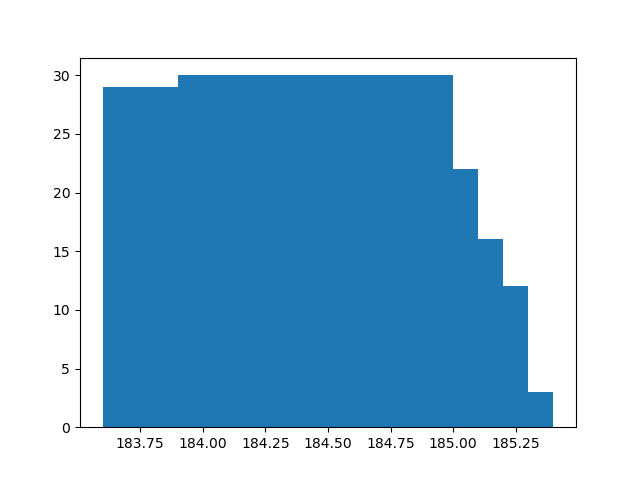

In [45]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.cla()
plt.bar(*zip(*xvals.items()))
plt.show()

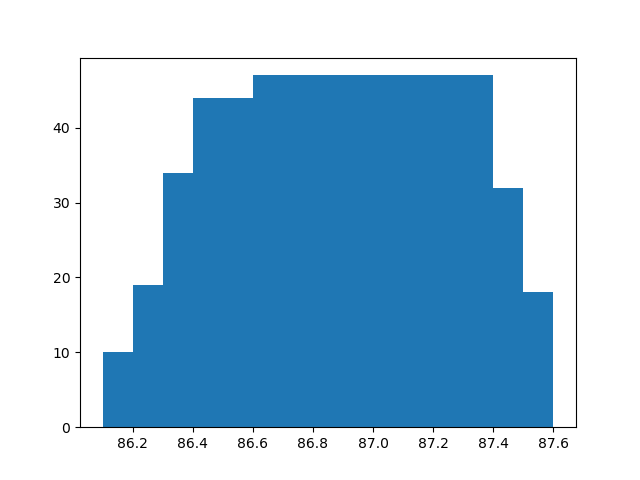

In [46]:
%matplotlib widget
plt.cla()
plt.bar(*zip(*yvals.items()))
plt.show()

AttributeError: 'NoneType' object has no attribute 'items'

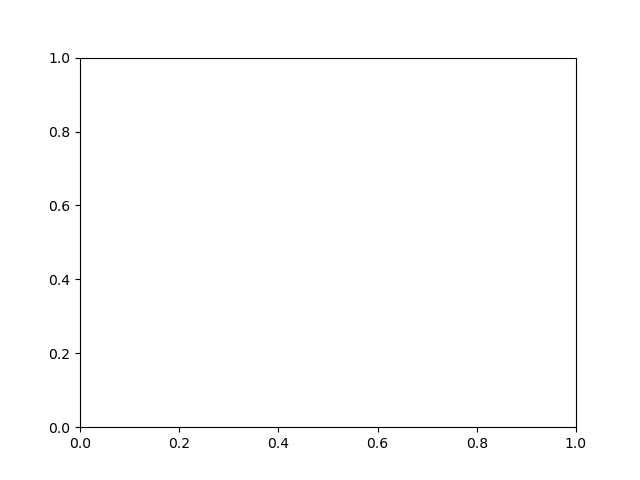

In [47]:
%matplotlib widget
plt.cla()
plt.bar(*zip(*zvals.items()))
plt.show()

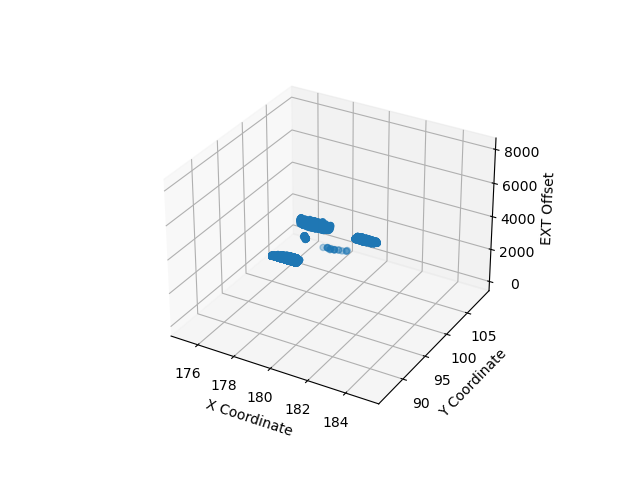

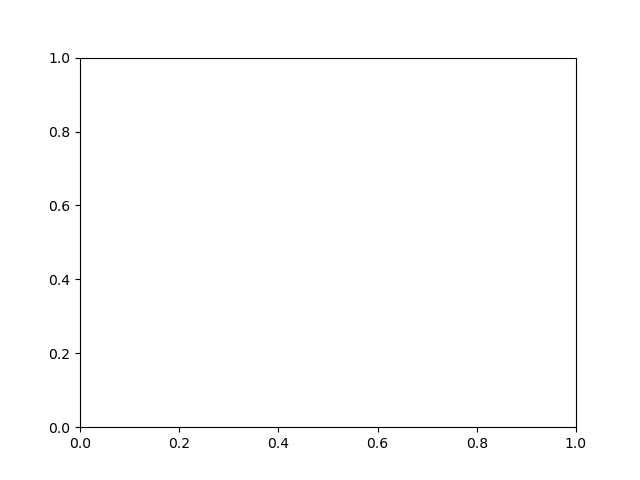

In [48]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
plt.cla()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(success_x,success_y,success_ext)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('EXT Offset')
plt.show()

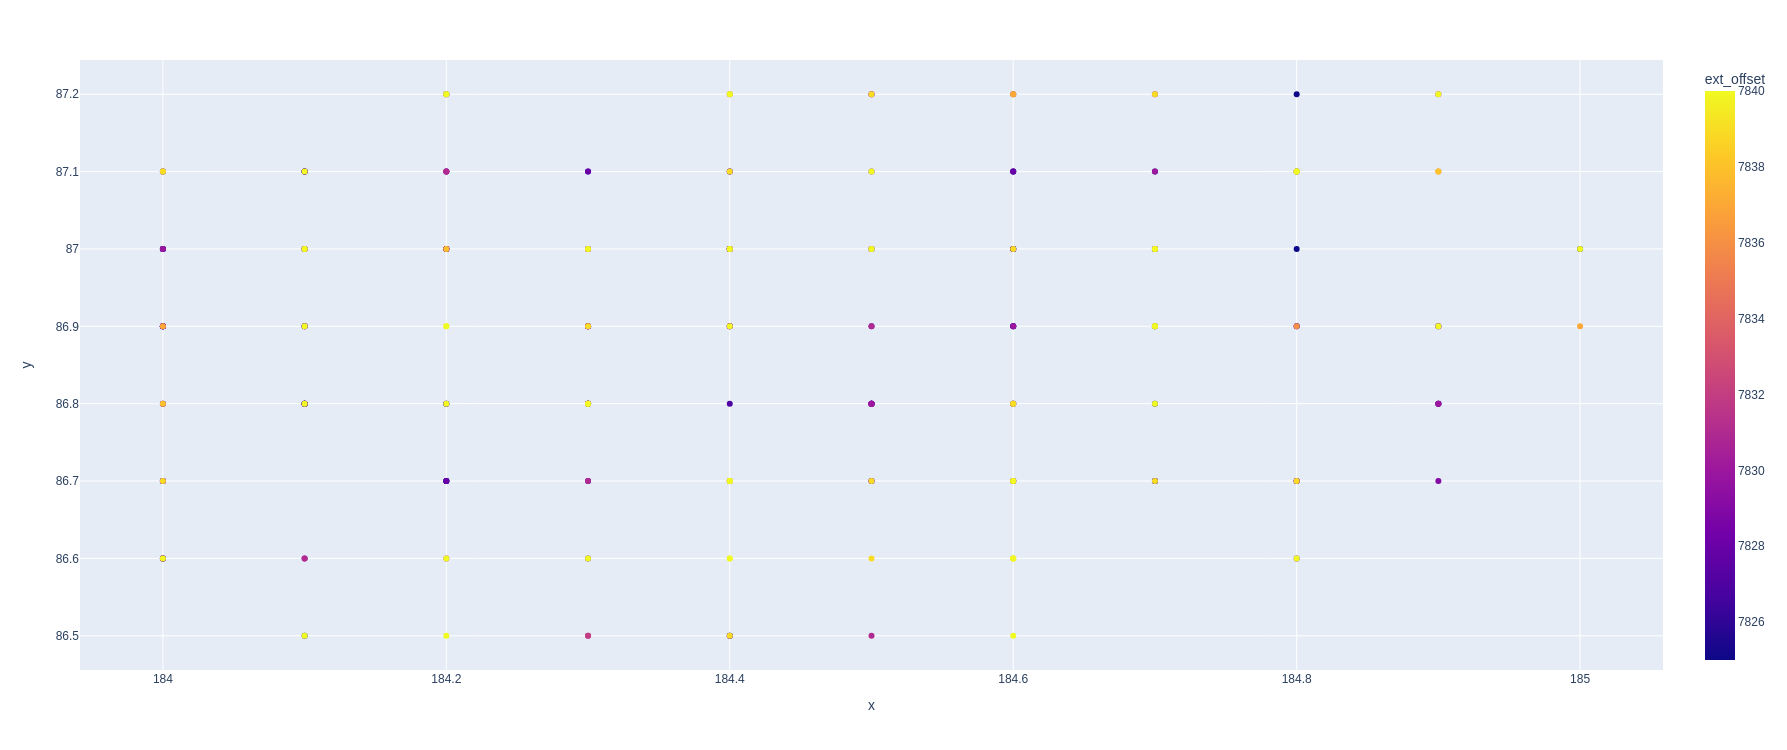

In [49]:
import pandas as pd
import plotly.express as px

#load data into a DataFrame object:
df = pd.DataFrame(gcDict)
df_filtered = df[df['success'] == 1]
fig = px.scatter(df_filtered, x="x", y="y", color="ext_offset",height=750,width=750)
fig.show()

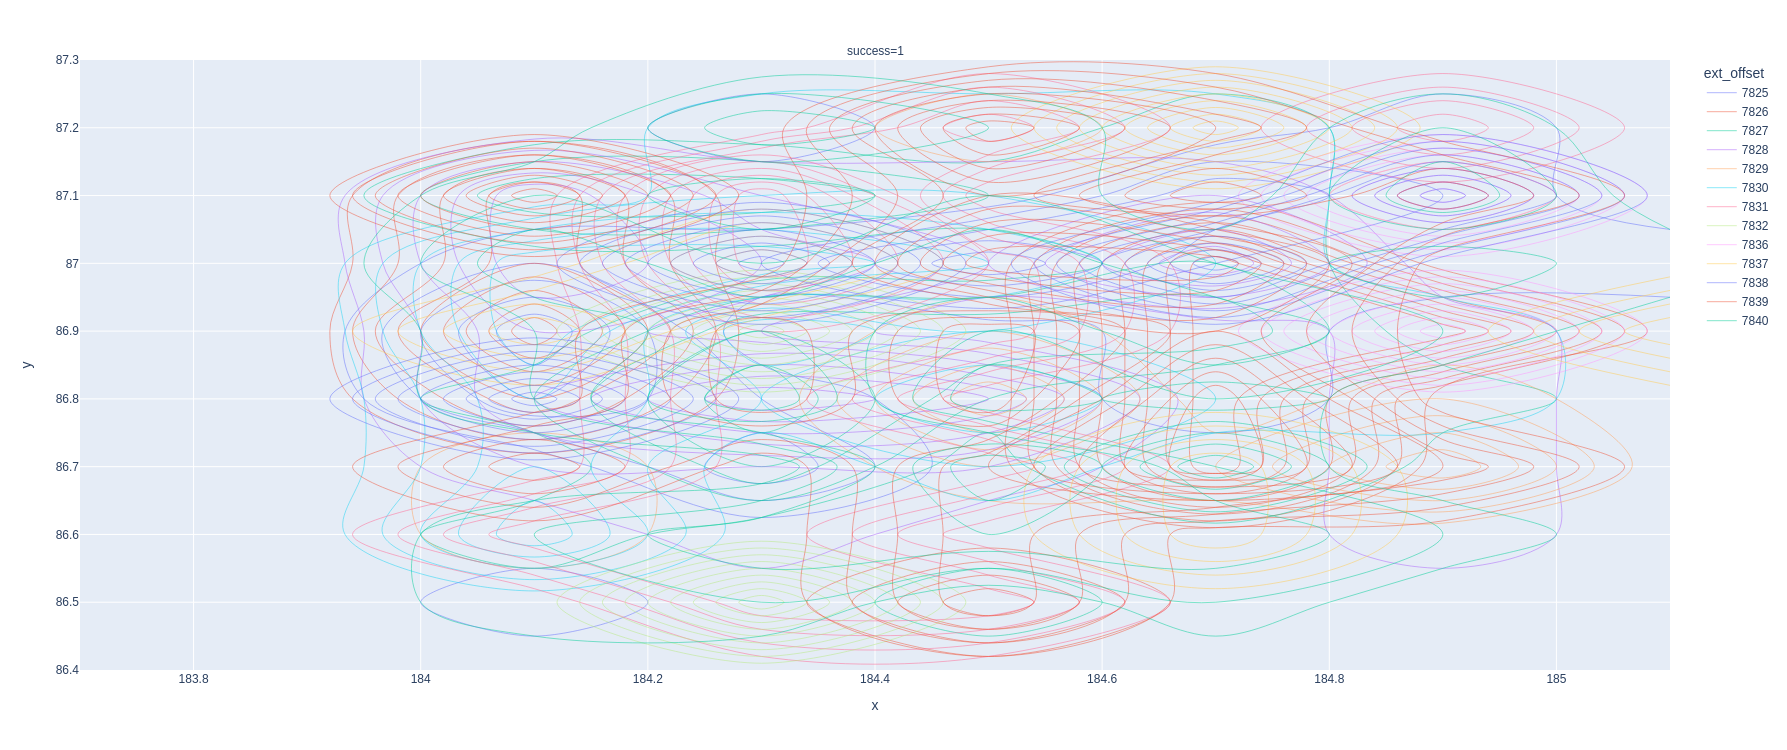

In [50]:
import plotly.express as px
fig = px.density_contour(df_filtered, x="x", y="y",facet_col="success", color="ext_offset",height=750,width=750)
fig.show()